#### Fashion MNist Data
this is a simple conv net model used to learn the fashion Mnist data.

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# load the data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

Train_Images Shape: (60000, 28, 28)
Train_Labels Shape: (60000,)
3


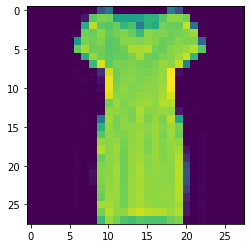

In [9]:
# explore tha data dimensions, labels
print("Train_Images Shape:", train_images.shape) 
print("Train_Labels Shape:", train_labels.shape)
plt.imshow(train_images[20])
print(train_labels[20])

In [10]:
# preprocess the data.
train_images = train_images/255.0
test_images = test_images/255.0

In [22]:
# define callback to stop training when reaching a specific accuracy.
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training in epoch!")
      self.model.stop_training = True
        
# describe the model > compile the model > fit the model.
model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(units=512, activation="relu"),
    keras.layers.Dense(units=10, activation="softmax")
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(train_images, train_labels, epochs=50, callbacks=[myCallback()])


Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4762 - accuracy: 0.8299
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3590 - accuracy: 0.8686
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3202 - accuracy: 0.8823
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2985 - accuracy: 0.8894
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2796 - accuracy: 0.8956
Epoch 6/50
1860/1875 [============================>.] - ETA: 0s - loss: 0.2645 - accuracy: 0.9018
Reached 90% accuracy so cancelling training in epoch!
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2645 - accuracy: 0.9017


In [23]:
# evaluate the model.
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8715


[0.36175182461738586, 0.8715000152587891]

In [7]:
# save the model.

In [8]:
# load the model and test it against new images.

#### Summary (what I learnt)